# Exercise 3.2, 3.3, 4.3, 4.6(e 제외) 
간단한 comment 들도 모두 print 해놓았습니다. 
4.6 문제에서 digit 을 red pen 으로 칠하라고 되어 있는 것은, 구별하라는 것으로 판단해서 error 를 보이는 digit 을 따로 표로 정리해두었습니다. 

# Exercise 3.2 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [145]:
#implement clgs, mgs, qrhouse, formQ
def clgs(A):
    [m,n]=np.shape(A)
    V=np.array(A.copy(), np.float64)
    Q=np.eye(m,n)
    R=np.zeros((n,n))
    for j in range(0, n):
        for i in range(0, j):
            R[i, j]=np.dot(np.transpose(Q[:, i:i+1]), A[:, j:j+1])
            V[:, j:j+1]=V[:, j:j+1]-R.item(i,j)*Q[:, i:i+1]
        R[j,j]=np.linalg.norm(V[:, j:j+1], 2)
        Q[:, j:j+1]=V[:, j:j+1]/R.item(j,j)
    return Q, R

sample=np.array([[17,24,1,8,15],[23,5,7,14,16],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]])
Q, R=clgs(sample)
print("function clgs")
print("R=",R, "\n\nQ=", Q)
    
def mgs(A):
    [m,n]=np.shape(A)
    Q=np.array(A.copy(), np.float64)
    R=np.zeros((n,n))
    for i in range(0, n-1):
        R[i, i]=np.linalg.norm(Q[:, i:i+1], 2)
        Q[:, i:i+1]=Q[:, i:i+1]/(R.item(i,i))
        R[i:i+1, i+1:n]=np.dot(np.transpose(Q[:, i:i+1]), Q[:, i+1:n])
        Q[:, i+1:n]=Q[:, i+1:n]-np.dot(Q[:, i:i+1], R[i:i+1, i+1:n])
    R[n-1, n-1]=np.linalg.norm(Q[:, n-1:n],2)
    Q[:, n-1:n]=Q[:, n-1:n]/(R.item(n-1,n-1))
    return Q, R

Q, R=mgs(sample)
print("\nfunction mgs")
print("R=",R, "\n\nQ=", Q)

def qrhouse(A):
    [m,n]=np.shape(A)
    R=np.array(A.copy(), np.double)
    V=np.zeros((m,n))
    for k in range(1, min(m-1, n)+1):
        x=R[k-1:m, k-1:k]
        normx=np.linalg.norm(x)
        v=x+(np.sign(x[0]))*normx*np.eye(len(x), 1)
        V[k-1:m, k-1:k]=v;
        R[k-1:m, k-1:n]=R[k-1:m, k-1:n]-np.dot((2*v),np.dot(np.transpose(v), R[k-1:m, k-1:n])/(np.dot(np.transpose(v), v)))
    R=np.triu(R[0:n, 0:n])
    return V, R
V, R=qrhouse(sample)
print("\nfunction qrhouse")
print("R=",R,"\nV=",V)

def formQ(V):
    [m,n]=np.shape(V)
    Q=np.eye(m,n)
    for i in range(min(m-1, n)):
        j=min(m-1,n)-i
        v=V[:, j-1:j]
        normv=np.dot(np.transpose(v), v)
        Q=Q-np.dot((2*v), np.dot(np.transpose(v), Q)/normv)
    return Q
Q=formQ(V)
print("\nformQ from qrhouse")
print("Q=",Q)


function clgs
R= [[32.48076354 26.63114736 21.39728025 23.70633926 25.86146102]
 [ 0.         19.89427029 12.32344153  1.94392582  4.0855794 ]
 [ 0.          0.         24.39854887 11.63155073  3.74147958]
 [ 0.          0.          0.         20.09820038  9.97393571]
 [ 0.          0.          0.          0.         16.00046287]] 

Q= [[ 0.52338671  0.50575423 -0.67346976  0.12154153  0.04410384]
 [ 0.70811143 -0.69657342  0.01772741 -0.08154163  0.08000231]
 [ 0.12314981  0.13674184  0.35575062  0.6307441   0.66463461]
 [ 0.30787454  0.19105742  0.41223097  0.4246716  -0.72002083]
 [ 0.33866199  0.45143866  0.49963121 -0.63276736  0.17744103]]

function mgs
R= [[32.48076354 26.63114736 21.39728025 23.70633926 25.86146102]
 [ 0.         19.89427029 12.32344153  1.94392582  4.0855794 ]
 [ 0.          0.         24.39854887 11.63155073  3.74147958]
 [ 0.          0.          0.         20.09820038  9.97393571]
 [ 0.          0.          0.          0.         16.00046287]] 

Q= [[ 0.523

# (a)

In [142]:
n=80
[U, X]=np.linalg.qr(np.random.rand(n,n))
[V, X]=np.linalg.qr(np.random.rand(n,n))
S=np.zeros((n,n), np.float)
for i in range(n):
    S[i,i]=S[i,i]+2**(-i-1)
    
A=np.dot(U, np.dot(S, V))

Qc, Rc=clgs(A)
Qm, Rm=mgs(A)
Rcjj=np.diag(Rc)
Rmjj=np.diag(Rm)
Sjj=np.diag(S)

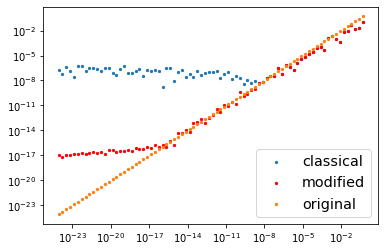

Modified version is more STABLE


In [143]:
plt.scatter(Sjj, Rcjj, s=5, label="classical")
plt.scatter(Sjj, Rmjj, color='red', s=5, label="modified")
plt.scatter(Sjj, Sjj, s=5, label="original")
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize='x-large')
plt.show()

print("Modified version is more STABLE")

# (b)

In [65]:
A=np.array([[0.7,0.70711], [0.70001,0.70711]])
print(A)
Qm, Rm=mgs(A)
V, R=qrhouse(A)
Q=formQ(V)
normh=np.linalg.norm(np.dot(np.transpose(Q), Q)-np.eye(2), 2)
normm=np.linalg.norm(np.dot(np.transpose(Qm), Qm)-np.eye(2), 2)
print("error from householder=",normh,"\nerror from modified =", normm)
print("householder qr decomposition is more stable")

[[0.7     0.70711]
 [0.70001 0.70711]]
error from householder= 5.708228349594477e-16 
error from modified = 2.30144444342989e-11
householder qr decomposition is more stable


# Exercise 3.3

In [171]:
def cs(x, y):
    theta=np.arctan(y/x)
    c=np.cos(-theta)
    s=np.sin(-theta)
    return c, s

def givensmatrix(m, i, j, A):
    x=A[j, j]
    y=A[i, j]
    c, s=cs(x,y)
    G=np.eye(m)
    G[i, i]=+c
    G[i, j]=+s
    G[j, i]=-s
    G[j,j]=+c
    return G

def givensqr(A):
    [m,n]=np.shape(A)
    R=np.array(A.copy(), np.float)
    Q=np.eye(m,n)
    for j in range(n):
        for i in range(m-j-1):
            a=m-i-1
            b=j
            G=givensmatrix(m,a,b,R)
            R=np.dot(G,R)
            Q=np.dot(Q, np.transpose(G))
    return Q, R

In [179]:
sample=np.array([[17,24,1,8,15],[23,5,7,14,16],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]])
Qg, Rg=givensqr(sample)
Qm, Rm=np.linalg.qr(sample)
print("Qg=", np.round(Qg,5), "\nRg=", np.round(Rg,5))
print()
print("Qm=", np.round(-Qm,5), "\nRm=", np.round(-Rm,5))

print("\nQR from Givens rotation and QR from built-in function is same upto sign.")
print("Since linear independence and making orthonormal basis are free to choose sign", 
      "we can say QR factorization is same between Givens rotation and built-in function .")

Qg= [[ 0.52339 -0.50575 -0.67347  0.12154 -0.0441 ]
 [ 0.70811  0.69657  0.01773 -0.08154 -0.08   ]
 [ 0.12315 -0.13674  0.35575  0.63074 -0.66463]
 [ 0.30787 -0.19106  0.41223  0.42467  0.72002]
 [ 0.33866 -0.45144  0.49963 -0.63277 -0.17744]] 
Rg= [[ 32.48076  26.63115  21.39728  23.70634  25.86146]
 [  0.      -19.89427 -12.32344  -1.94393  -4.08558]
 [ -0.       -0.       24.39855  11.63155   3.74148]
 [  0.       -0.        0.       20.0982    9.97394]
 [ -0.       -0.        0.        0.      -16.00046]]

Qm= [[ 0.52339 -0.50575 -0.67347  0.12154  0.0441 ]
 [ 0.70811  0.69657  0.01773 -0.08154  0.08   ]
 [ 0.12315 -0.13674  0.35575  0.63074  0.66463]
 [ 0.30787 -0.19106  0.41223  0.42467 -0.72002]
 [ 0.33866 -0.45144  0.49963 -0.63277  0.17744]] 
Rm= [[ 32.48076  26.63115  21.39728  23.70634  25.86146]
 [ -0.      -19.89427 -12.32344  -1.94393  -4.08558]
 [ -0.       -0.       24.39855  11.63155   3.74148]
 [ -0.       -0.       -0.       20.0982    9.97394]
 [ -0.       -0.     

# Exercise 4.3

(a)


C:\Users\Minyoung Kim\anaconda3\lib\site-packages\numpy\core\_asarray.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


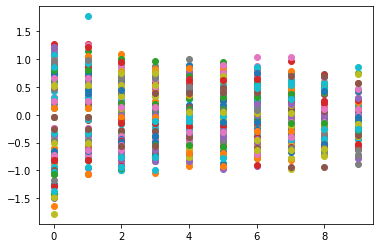

hard to find the pattern


In [108]:
def eig_random_matrix(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    w,_=np.linalg.eig(mat)
    return w
#(a)
print("(a)")
#for m=10 
m=10
x=np.array(list(range(10)))
for i in range(100):
    w=eig_random_matrix(10)
    plt.scatter(x, w)
plt.show()
print("hard to find the pattern")

m= 8


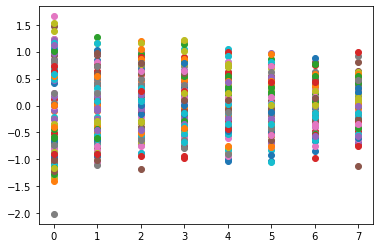

m= 16


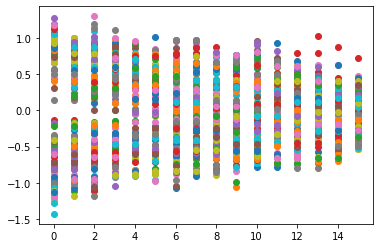

m= 32


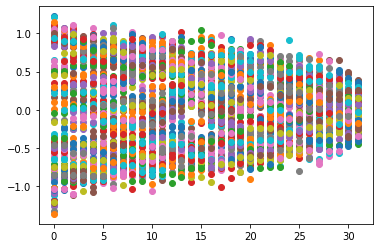

m= 64


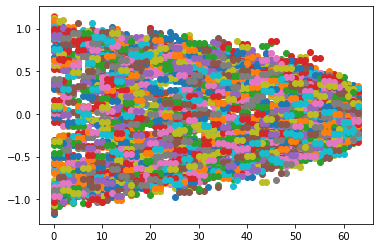

m= 128


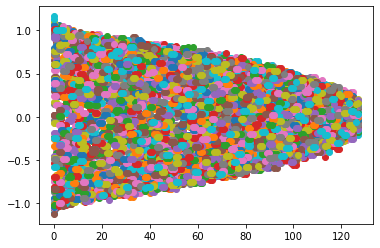

m= 256


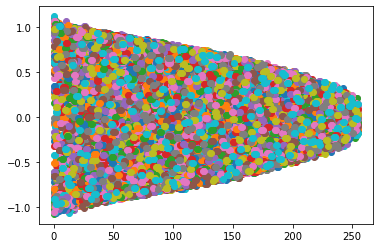

m= 512


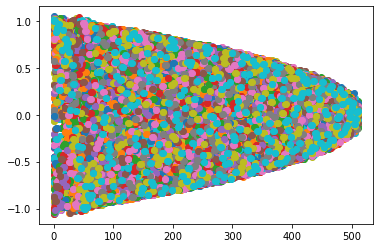

Patten is similar to rotated quadratic function 


In [109]:
R=[]
ave=0

for i in range(7):
    m=2**(i+3)
    x=np.array(list(range(m)))
    for i in range(100):
        w=eig_random_matrix(m)
        plt.scatter(x, w)
        ave=ave+max(w)/100
    R.append(ave)
    ave=0
    print("m=", m)
    plt.show()
print("Patten is similar to rotated quadratic function ")

Spectral radius


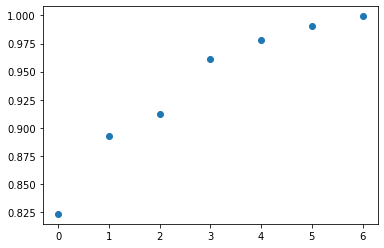

averaged spectral radius approaches to 1 as m increases


In [214]:
print("Spectral radius")
x=np.array(list(range(7))).reshape(1,7)
y=np.array(R).reshape(1,7)
plt.scatter(x,y)
plt.show()
print("averaged spectral radius approaches to 1 as m increases")

(b)


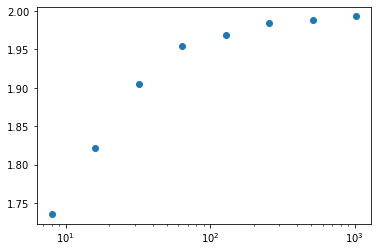

2-norm approaches to 2 as m increases


In [218]:
#(b)
def norm_2_random_matrix(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    norm=np.linalg.norm(mat,2)
    return norm
print("(b)")

norms=[]
x=[]
for i in range(8):
    m=2**(i+3)
    x.append(m)
    for i in range(100):
        norm=norm_2_random_matrix(m)
        ave=ave+norm/100
    norms.append(ave)
    ave=0
plt.scatter(x,norms)
plt.xscale('log')
plt.show()
print("2-norm approaches to 2 as m increases")

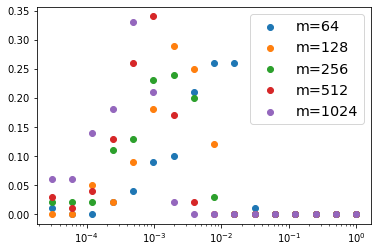

In [148]:
#(c)
def singularmin(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    _, sigma, _=np.linalg.svd(mat)
    s=min(sigma)
    return s

def distribution(list):
    dist=np.zeros((16,1))
    _, l=np.shape(list)
    for i in range(l):
        x=list[0, i].item()
        for j in range(16):
            if (x*(2**j)>=1):
                dist[j,0]=dist[j,0]+1/l
                break
            if(j==15):
                dist[j,0]=dist[j,0]+1/l
    return dist

def dist_m(m):
    sigmas=np.zeros((1,100))
    for i in range(100):
        sigmas[0,i]=singularmin(m)
    dist=distribution(sigmas)
    return dist

x=np.zeros((16,1))
for i in range(16):
    x[i,0]=2**(-i)
Y=np.zeros((16,5))
for i in range(5):
    m=2**(i+6)
    Y[:,i:i+1]=dist_m(m)
    name="m="+str(m)
    plt.scatter(x,Y[:,i:i+1], label=name)
    plt.xscale('log')
    plt.legend(fontsize='x-large')


(c)
the middle of distribution of the smallest singular value and proportion of tail decreases as m increases 


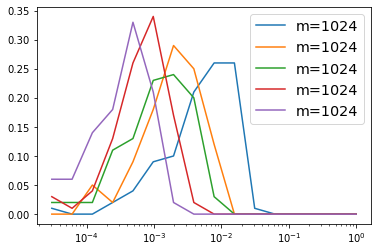

In [149]:
print("(c)")
for i in range(5):
    plt.plot(x,Y[:,i:i+1], label=name)
    plt.xscale('log')
    plt.legend(fontsize='x-large')
print("the middle of distribution of the smallest singular value and proportion of tail decreases as m increases ")   

m= 8


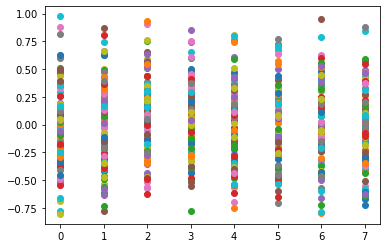

m= 16


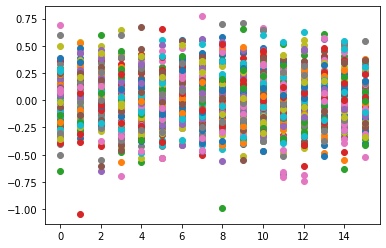

m= 32


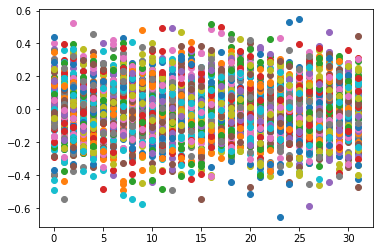

m= 64


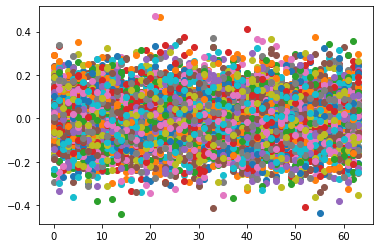

m= 128


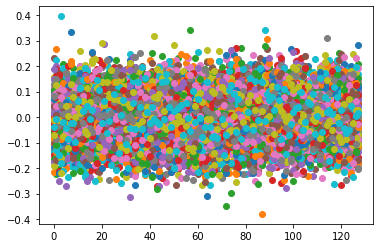

m= 256


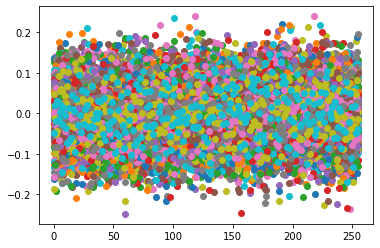

m= 512


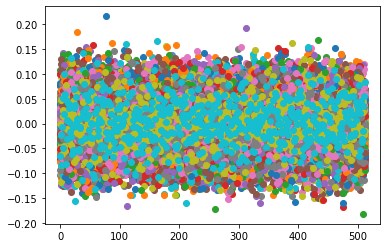

there is no pattern
Spectral radius


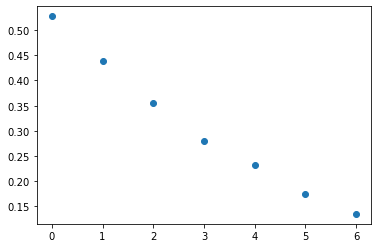

averaged spectral radius decreases as m increases


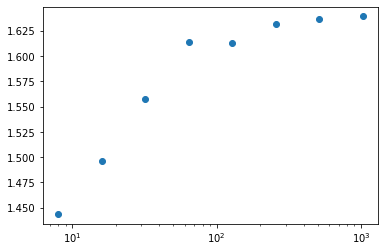

2-norm increases as m increases(it approaches to 1.65)


In [151]:
#(d)
def eig_random_matrix(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    mat=np.triu(mat)
    w,_=np.linalg.eig(mat)
    return w
R=[]
ave=0

for i in range(7):
    m=2**(i+3)
    x=np.array(list(range(m)))
    for i in range(100):
        w=eig_random_matrix(m)
        plt.scatter(x, w)
        ave=ave+max(w)/100
    R.append(ave)
    ave=0
    print("m=", m)
    plt.show()
print("there is no pattern")
print("Spectral radius")
x=np.array(list(range(7))).reshape(1,7)
y=np.array(R).reshape(1,7)
plt.scatter(x,y)
plt.show()
print("averaged spectral radius decreases as m increases")
def norm_2_random_matrix(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    mat=np.triu(mat)
    norm=np.linalg.norm(mat,2)
    return norm
norms=[]
x=[]
for i in range(8):
    m=2**(i+3)
    x.append(m)
    for i in range(100):
        norm=norm_2_random_matrix(m)
        ave=ave+norm/100
    norms.append(ave)
    ave=0
plt.scatter(x,norms)
plt.xscale('log')
plt.show()
print("2-norm increases as m increases(it approaches to 1.65)")



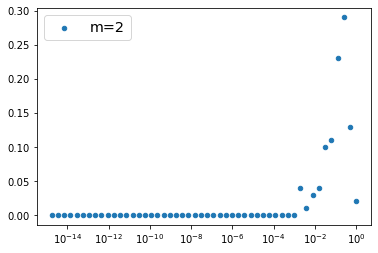

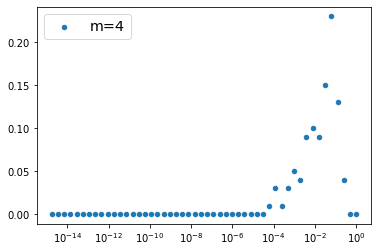

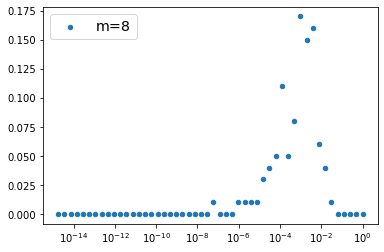

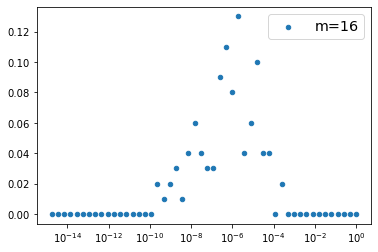

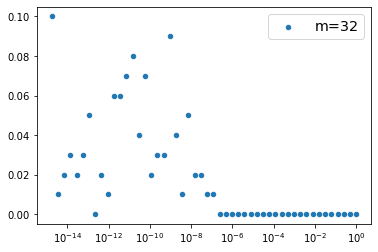

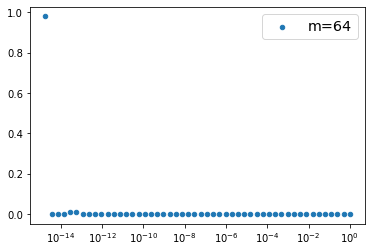

Minimum of singular value is MUCH SMALLER than of original random matrix. Hence, the tale is BIG compared to original random matrix


In [165]:
def singularmin(m):
    mat=np.random.normal(0, 1/(np.sqrt(m)), size=(m,m))
    mat=np.triu(mat)
    _, sigma, _=np.linalg.svd(mat)
    s=min(sigma)
    return s

def distribution(list):
    dist=np.zeros((1,50))
    _, l=np.shape(list)
    for i in range(l):
        x=list[0, i].item()
        for j in range(50):
            if (x*(2**j)>=1):
                dist[0,j]=dist[0,j]+1/l
                break
            if(j==49):
                dist[0,j]=dist[0,j]+1/l
    return dist

def dist_m(m):
    sigmas=np.zeros((1,100))
    for i in range(100):
        sigmas[0,i]=singularmin(m)
    dist=distribution(sigmas)
    return dist

x=np.zeros((1,50))
for i in range(50):
    x[0,i]=2**(-i)

for i in range(6):
    m=2**(i+1)
    y=dist_m(m)
    name="m="+str(m)
    plt.scatter(x,y, label=name, s=20)
    plt.xscale('log')
    plt.legend(fontsize='x-large')
    plt.show()

print("Minimum of singular value is MUCH SMALLER than of original random matrix. Hence, the tale is BIG compared to original random matrix")

# Exercise 4.6

In [98]:
import scipy.linalg as lin
import pandas as pd

def fac(n):
    if(n>1):
        return fac(n-1)*n
    elif(n==1):
        return n
    
#Setting
m=50
n=12
t=np.linspace(0,1,m)
A=np.vander(t,n, increasing=True)
b=np.cos(t)
x=np.array([1,0,-1/fac(2),0,1/fac(4),0,-1/fac(6),0,1/fac(8),0,-1/fac(10),0]).reshape(12,1)
print("A: ", np.shape(A), "matrix \nb: ",np.shape(b),"matrix")

A:  (50, 12) matrix 
b:  (50,) matrix


In [99]:
def calculatedx(Q,R,b):
    [n,n]=np.shape(R)
    (m,)=np.shape(b)
    y=np.dot(np.transpose(Q),b) # y=Q'*b
    y=np.array(y, np.double).reshape(n,1)
    x=np.zeros((n,1))
    for i in range(n):
        j=n-i-1
        x[j,0]=(y[j,0]-np.dot(R[j:j+1,j:n], x[j:n,0:1]))/(R.item(j,j))
    return x

In [100]:
X=np.zeros((12,6))

#(a): normal equation
x_a=np.dot(np.linalg.inv(np.dot(np.transpose(A),A)), np.dot(np.transpose(A),b))
x_a=np.array(x_a).reshape(12,1)
X[:,0:1]=x_a

#(b): mgs
Qm, Rm=mgs(A)
x_b=calculatedx(Qm,Rm,b)
X[:,1:2]=x_b

#(c): qrhouse
Vh,Rh=qrhouse(A)
Qh=formQ(Vh)
x_c=calculatedx(Qh,Rh,b)
X[:,2:3]=x_c

#(d): qr in python
Q,R=np.linalg.qr(A)
x_d=calculatedx(Q,R,b)
X[:,3:4]=x_d

#(f): SVD python
U, s, V=lin.svd(A, full_matrices=False)

y=np.dot(np.transpose(U),b)
x_f=np.dot(np.transpose(V), np.dot(np.diag(1/s),y)).reshape(12,1)

X[:,4:5]=x_f
X[:,5:6]=x

In [101]:
df=pd.DataFrame(X,columns=["(a)","(b)","(c)","(d)","(f)", "real x"])
df

,(a),(b),(c),(d),(f),real x
0,0.993033,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,0.090488,-6.742116e-07,7.602358e-14,8.028858e-14,7.505108e-14,0.000000e+00
2,-0.719940,-4.999747e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01,-5.000000e-01
3,0.166138,-3.732704e-04,6.560272e-11,5.982252e-11,6.106673e-11,0.000000e+00
4,0.121094,4.452495e-02,4.166667e-02,4.166667e-02,4.166667e-02,4.166667e-02
5,-0.328125,-1.290167e-02,3.463198e-09,3.122437e-09,3.222238e-09,0.000000e+00
6,0.390625,3.519762e-02,-1.388901e-03,-1.388900e-03,-1.388900e-03,-1.388889e-03
7,-0.250000,-6.701405e-02,2.877192e-08,2.659365e-08,2.729792e-08,0.000000e+00
8,0.093750,7.921719e-02,2.475647e-05,2.475920e-05,2.475828e-05,2.480159e-05
9,-0.015625,-5.830206e-02,4.695992e-08,4.486300e-08,4.559459e-08,0.000000e+00


In [105]:
#(g)
errordigit=np.zeros((12,5))
for i in range(5):
    errordigit[:,i:i+1]=np.log10(np.abs(X[:,i:i+1]-X[:,5:6]))
df2=pd.DataFrame(errordigit, columns=["(a)","(b)","(c)","(d)","(f)"])
print("Normal equation is INSTABLE")
print("Since it is hard to COLOR in jupyter pandas module, I drew the table of digits that appears to be wrong.")
print("You can find that x from normal equation is instable \nand from modified gram shmidt is more stable than normal equation \nbut is less stable than other methods.")
df2

Normal equation is INSTABLE
Since it is hard to COLOR in jupyter pandas module, I drew the table of digits that appears to be wrong.
You can find that x from normal equation is instable 
and from modified gram shmidt is more stable than normal equation 
but is less stable than other methods.


,(a),(b),(c),(d),(f)
0,-2.156963,-8.640496,-14.954590,-15.051500,-15.954590
1,-1.043409,-6.171204,-13.119052,-13.095346,-13.124643
2,-0.657695,-4.596422,-11.447625,-11.467834,-11.469522
3,-0.779532,-3.427976,-10.183078,-10.223135,-10.214195
4,-1.100031,-2.543894,-9.207405,-9.253329,-9.240504
5,-0.483961,-1.889354,-8.460523,-8.505506,-8.491842
6,-0.406699,-1.436679,-7.910627,-7.951114,-7.938181
7,-0.602060,-1.173834,-7.541031,-7.575222,-7.563871
8,-1.028144,-1.101317,-7.345635,-7.372745,-7.363437
9,-1.806180,-1.234316,-7.328273,-7.348112,-7.341087
